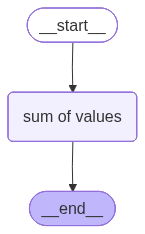

{'values': [1, 2, 3, 4], 'name': 'Morey'}
{'values': [1, 2, 3, 4], 'name': 'Morey', 'result': 'Hi there Morey! your sum = 10'}


{'values': [1, 2, 3, 4],
 'name': 'Morey',
 'result': 'Hi there Morey! your sum = 10'}

In [3]:
# Now we are going to pass multiple to graph

from typing import List, TypedDict # List, TypedDictionary
from langgraph.graph import StateGraph # framework that helps you design and manage the flow of tasks (nodes) in your application using graph structure



# create agent state schema
class AgentState(TypedDict):
    values : List[int]
    name : str
    result : str
    
    
    


# build our node
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs"""

    print(state)
    state["result"] = f"Hi there {state['name']}! your sum = {sum(state['values'])}"

    print(state)
    return state



# create our graph
graph = StateGraph(AgentState)

graph.add_node("sum of values", process_values)

# set start point
graph.set_entry_point("sum of values")

# set end point
graph.set_finish_point("sum of values")

app = graph.compile()



from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))



# start out app
app.invoke({"values": [1, 2, 3, 4], "name": "Morey"})
